# Polynomial Regression

In [1]:
# Importing notebooks to conduct our multiregression data analysis:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



# Define x= np.array(df_poly['LSTAT']) and  y= np.array(df_poly['price']). Draw a scatter plot for price vs LSTAT using x and y. 

In [2]:
# Assigning the boston polynomial dataframe as df_poly:

df_poly = pd.read_csv ("boston_polynomial.csv")
df_poly

,price,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33
...,...,...
501,22.4,9.67
502,20.6,9.08
503,23.9,5.64
504,22.0,6.48


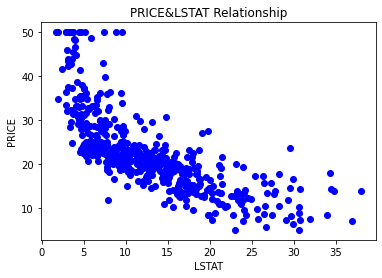

In [3]:
# Looking at the relationship between Price and LSTAT using a scatterplot:

x= np.array(df_poly['LSTAT']) 
y= np.array(df_poly['price'])
plt.scatter(x,y, c='blue')
plt.title('PRICE&LSTAT Relationship')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')

plt.show()

# Importing PolynomialFeatures class from sklearn.preprocessing. Then fit_transform your x and call it X_poly. Set polynomial degree = 5.

In [65]:
# setting polynomial features to the fifth order. 
poly = PolynomialFeatures(degree=5)

In [64]:
# Fitting transforming our x variable and assigning it to X_poly:

X_poly = pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5
0,1.0,4.98,24.8004,123.505992,615.059840,3062.998004
1,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981
2,1.0,4.03,16.2409,65.450827,263.766833,1062.980336
3,1.0,2.94,8.6436,25.412184,74.711821,219.652754
4,1.0,5.33,28.4089,151.419437,807.065599,4301.659644


# Splitting the data into test (30%) and train set (70%).

In [6]:
# Splitting dataframe into train set and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=100)

In [7]:
# Verifying if our split was done correctly:
np.round(len(X_train)/len(x),3)

# Great! Our trained data set is comprised of 70% while the test set of 30%, just as needed. 

0.7

In [8]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     171.8
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           1.09e-91
Time:                        16:54:09   Log-Likelihood:                -1051.4
No. Observations:                 354   AIC:                             2115.
Df Residuals:                     348   BIC:                             2138.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             69.1558      3.860     17.918      0.000      61.565      76.747
1            -12.7244      1.622     -7.845      0.000     -15.915      -9.534
2              1.3815      0.237      5.833      0.000       0.916       1.847
3             -0.0752      0.015     -4.936      0.000      -0.105      -0.045
4              0.0019      0.000      4.381      0.000       0.001       0.003
5          -1.844e-05   4.64e-06     -3.977      0.000   -2.76e-05   -9.32e-06
==============================================================================
Omnibus:                       56.722   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.920
Skew:                           0.865   Prob(JB):                     4.98e-25
Kurtosis:                       5.144   Cond. No.                     1.53e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Using Linear Regression model to train the model. 

In [70]:
model_boston = LinearRegression()
model_boston.fit(X_train, y_train)

LinearRegression()

# Saving the predicted values for the test set in y_hat_test

In [71]:
y_hat_test = model_boston.predict(X_test)

# Constructing a dataframe named predictions which has 3 columns:

In [72]:
Poly_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
Poly_predictions.head()

,y_test,y_hat_test,resid
0,34.6,27.114768,7.485232
1,31.5,37.217467,-5.717467
2,20.6,23.184036,-2.584036
3,14.5,20.155145,-5.655145
4,16.2,21.151035,-4.951035


# Reporting the RMSE_test (RMSE in the test set)

In [73]:
RMSE_test= y_test - y_hat_test
MSE_test = np.mean(np.square(RMSE_test))
round(MSE_test,2)

37.82

# Estimating the RMSE_test using K-Fold Cross Validation technqiue and naming it RMSE_CV5

In [74]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [78]:
RMSE_CV5=[]
iterator= range(1,6) # the second number is polynomial degree 
for i in iterator:
    X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree=i).fit_transform(x.reshape(-1,1)), y, test_size=0.3, random_state=100)
    MSE = -cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV5.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(iterator), columns=['Poly degree'])
output['RMSE_CV5']=RMSE_CV5

output

,Poly degree,RMSE_CV5
0,1,5.924507
1,2,5.135839
2,3,4.963838
3,4,4.832973
4,5,4.770599


# My_Polynomial_Regression and the table (Degree from 1 to 10, RMSE_test, and RMSE_Train)

In [80]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, RMSE_train, RMSE_test


In [82]:
my_polynomial_regression(poly_degree=5,X=x,y=y)

(5, 4.72, 6.15)

In [84]:
returns= []
for i in range(1,11):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,5.92,6.88
1,2,5.13,6.32
2,3,4.95,6.26
3,4,4.82,6.16
4,5,4.72,6.15
5,6,4.70,6.17
6,7,4.69,6.17
7,8,4.69,6.16
8,9,4.69,6.15
9,10,4.69,6.15


# Using the table above to plot the RMSE_test and the RMSE_train against the Degree on the horizontal axis


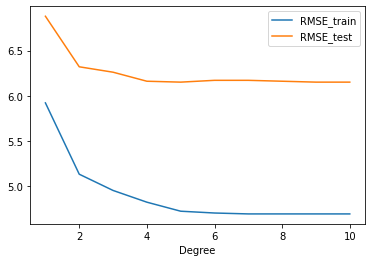

In [86]:
output.set_index('Degree').plot()
plt.show()

# What is the optimal polynomial degree based on the observations above from the table and graph